In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


import the csv data as pandas dataframe

In [6]:
df = pd.read_csv("StudentsPerformance.csv")


Show Top  5 Record

In [7]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape

In [8]:
df.shape


(1000, 8)

2.1 Dataset Information
Gender: Sex of students → (Male/Female) 👨
Race/Ethnicity: Ethnicity of students → (Group A, B, C, D, E) 🏹
Parental Level of Education: Parents' final education → (Bachelor's degree, Some college, Master's degree, Associate's degree, High school) 📚
Lunch: Having lunch before test → (Standard or Free/reduced) 🍟
Test Preparation Course: Complete or not complete before test 📝
Math Score €Calculator;
Reading Score 📚
Writing Score 

3.Data Checks to perform
 check missing, duplicate, type,no. of  unique vaue of each value, statics of datasets

3.1 Check Missing  values

In [9]:
df.isna().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing values in the dataset

3.2 Check Duplicate

In [10]:
df.duplicated().sum()


np.int64(0)

THere is no duplicate

3.3 Check data types

In [11]:
# check null and dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique values of each column

In [12]:
df.nunique()


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5 Check stattistics of data set

In [13]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights 

.From above description of numerical data, all means are very close to each other - between 66 and 68.05;
.All standard deviations are also close - between 14.6 and 15.19;
.While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

3.7 Exploring data

In [15]:
print("categorical in 'gender' variable: ",end="")
print(df['gender'].unique())

print("categorical in 'race/ethnicity' variable: ",end="")
print(df['race/ethnicity'].unique())

print("categorical in 'parental level of eduacation' variable: ",end="")
print(df['lunch'].unique())

print("categorical in 'test preparation cource' variable: ",end="")
print(df['test preparation course'].unique())


categorical in 'gender' variable: ['female' 'male']
categorical in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categorical in 'parental level of eduacation' variable: ['standard' 'free/reduced']
categorical in 'test preparation cource' variable: ['none' 'completed']


In [16]:
# define numbers & categorical columns

numeric_feature= [feature for feature in df.columns if df[feature].dtype !='o']
categorical_feature = [feature for  feature in df.columns if df[feature].dtype =='o']

# print columns
print('we have {} numeric feature :{}'.format(len(numeric_feature), numeric_feature))
print("\nWe have {} categorical feature :{}".format(len(categorical_feature),categorical_feature))



we have 8 numeric feature :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

We have 0 categorical feature :[]


In [17]:
df.head(2)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


3.8 Adding columns for "Total Score And  Average"

In [18]:
df['total score'] = df['math score'] + df['reading score']+ df['writing score']
df['average'] = df['total score']/3
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full=df[df['writing score']== 100]['average'].count()
math_full=df[df['math score']==100]['average'].count()

print(f"Number of  student with full marks in marks :{math_full}")
print(f"Number of student with full marks in writng:{writing_full}")
print(f"Number of student with full marks in raeding {reading_full}")



Number of  student with full marks in marks :7
Number of student with full marks in writng:14
Number of student with full marks in raeding 17


In [20]:
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [23]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20=df[df['writing score'] <=20]['average'].count()
math_less_20 = df[df['math score'] <=20]['average'].count()

print(f'Number of student with less than 20 marks in math :{math_less_20}')
print(f'Number of student with less than 20 marks in writing :{writing_less_20}')
print(f'Number of student with less than 20 marks in reading :{reading_less_20}')



Number of student with less than 20 marks in math :4
Number of student with less than 20 marks in writing :3
Number of student with less than 20 marks in reading :1


insights
 . from above vlaues we get students have performed the worst in math
 .Best performance is in reading section 

4. Exploring Data (visualization)

4.1 Visualize average score distribution to make some conclusion.
 . histogram
 .kernel Distribution Function (KDE)
 

4.1.1 Histogram & KDE

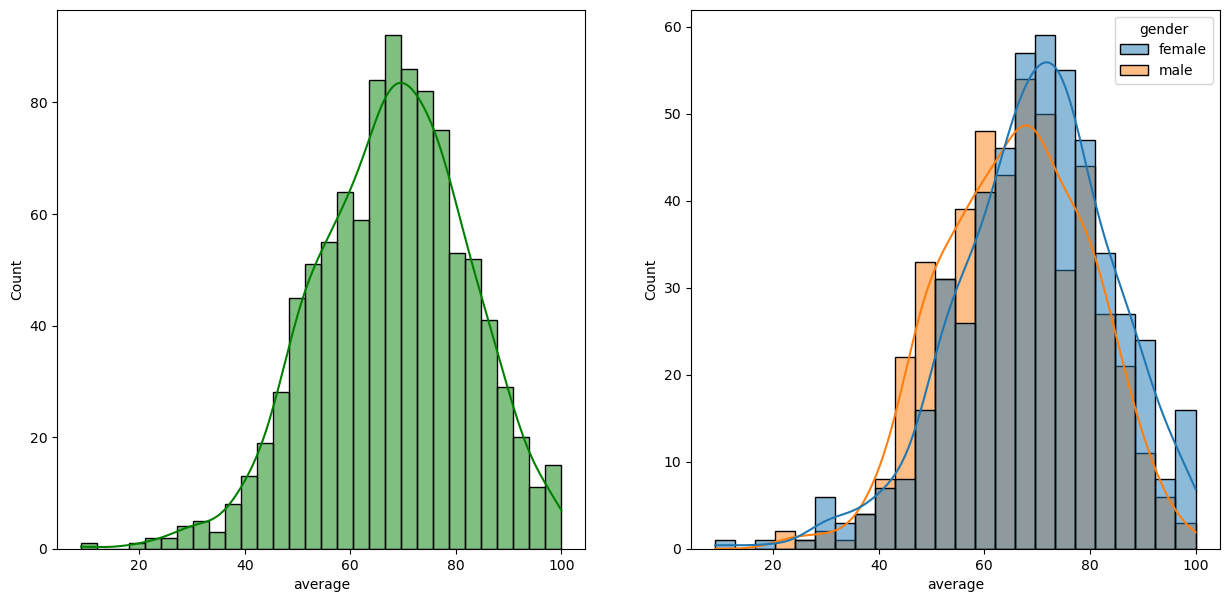

In [34]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()


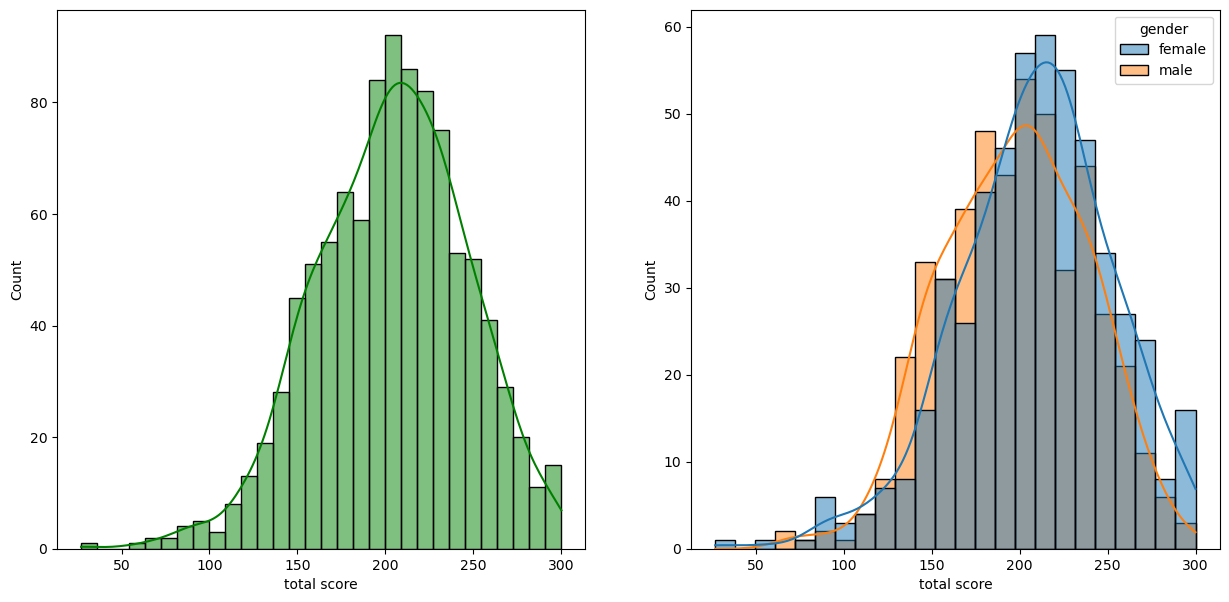

In [35]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()


insights

.Female students tend to perform well then male students.

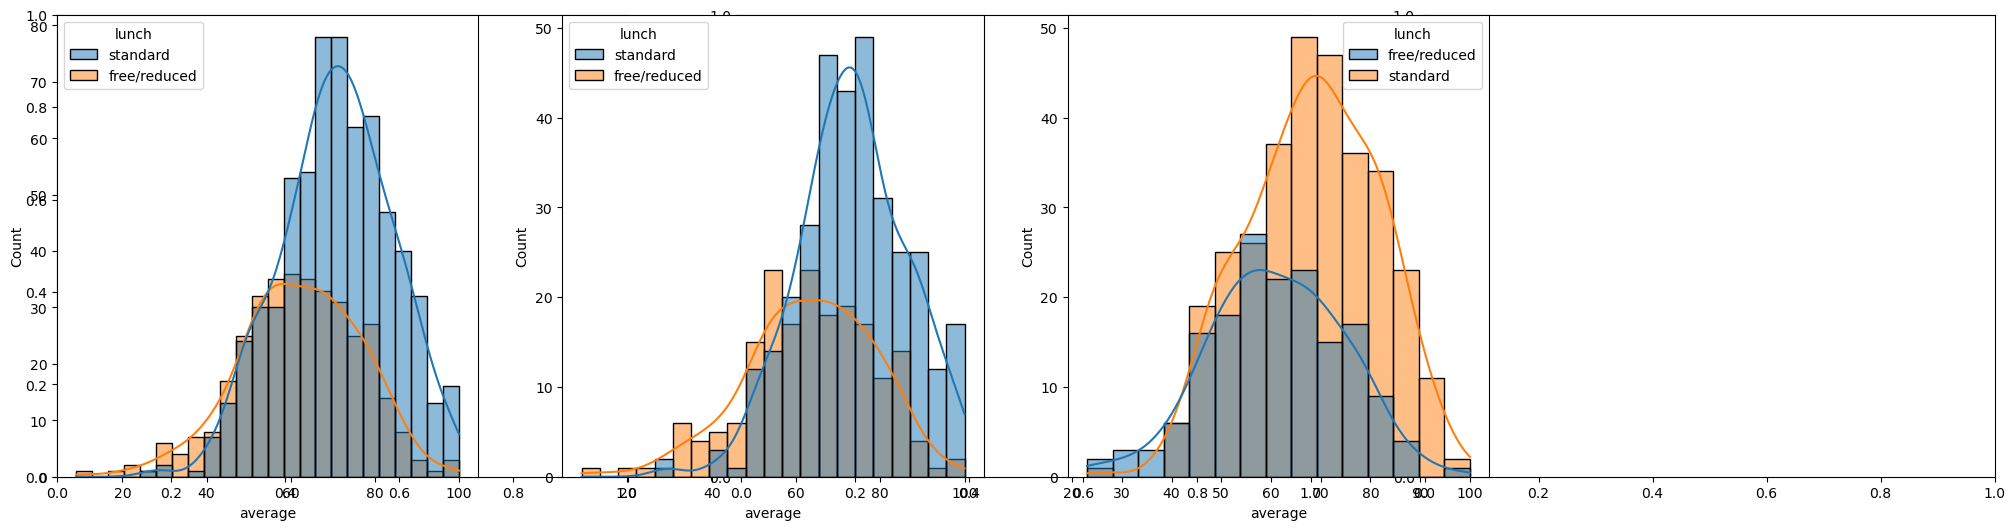

In [37]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


insights
 .standard lunch helps perform well in exams.
 .standerd lunch helps perform well inn exam be it a male or a female.

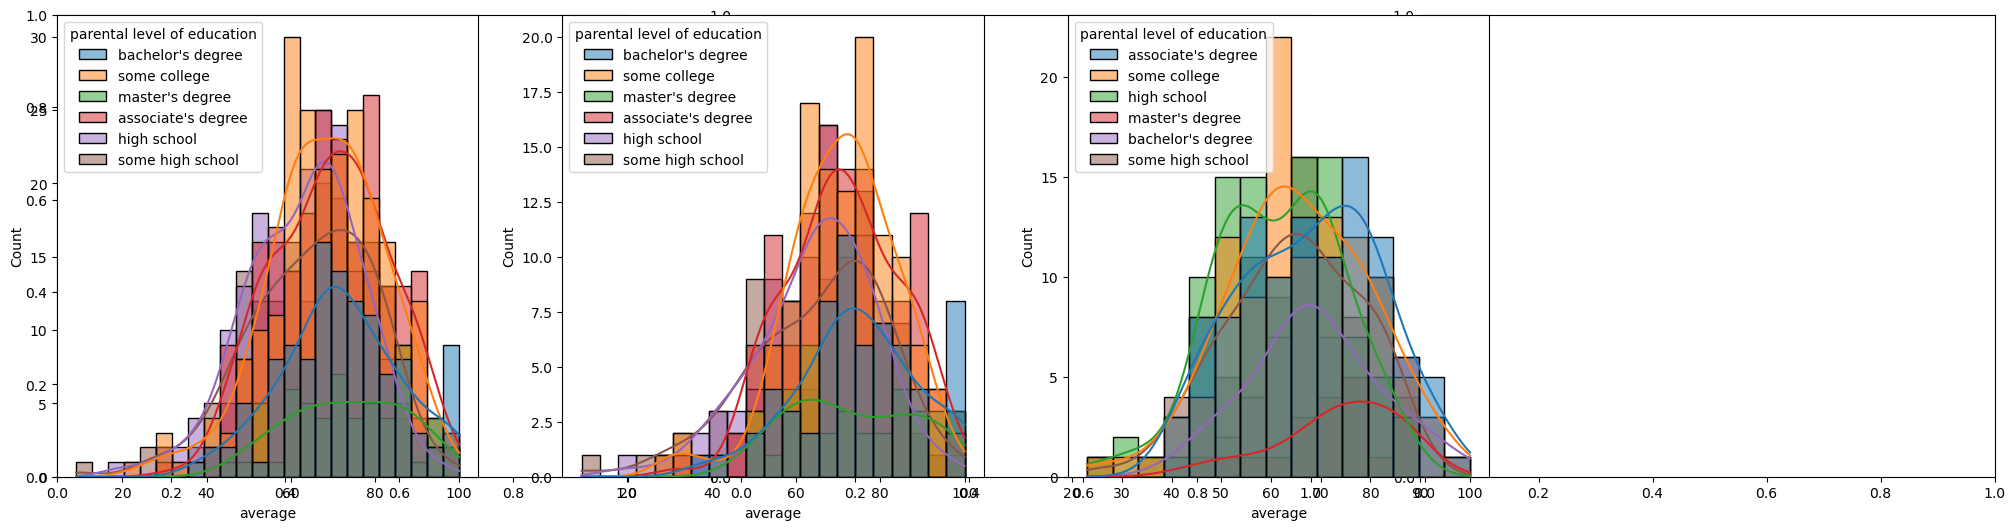

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()


insights
 .in general parent's education don't help student perform well in exam.
 .2nd plot shows that parent's whose education is ofassociat's of degree or master's degree thier male child tend to perform well  in exam.
 .3rd plot we can see ther is no effect of parent's education on female students.

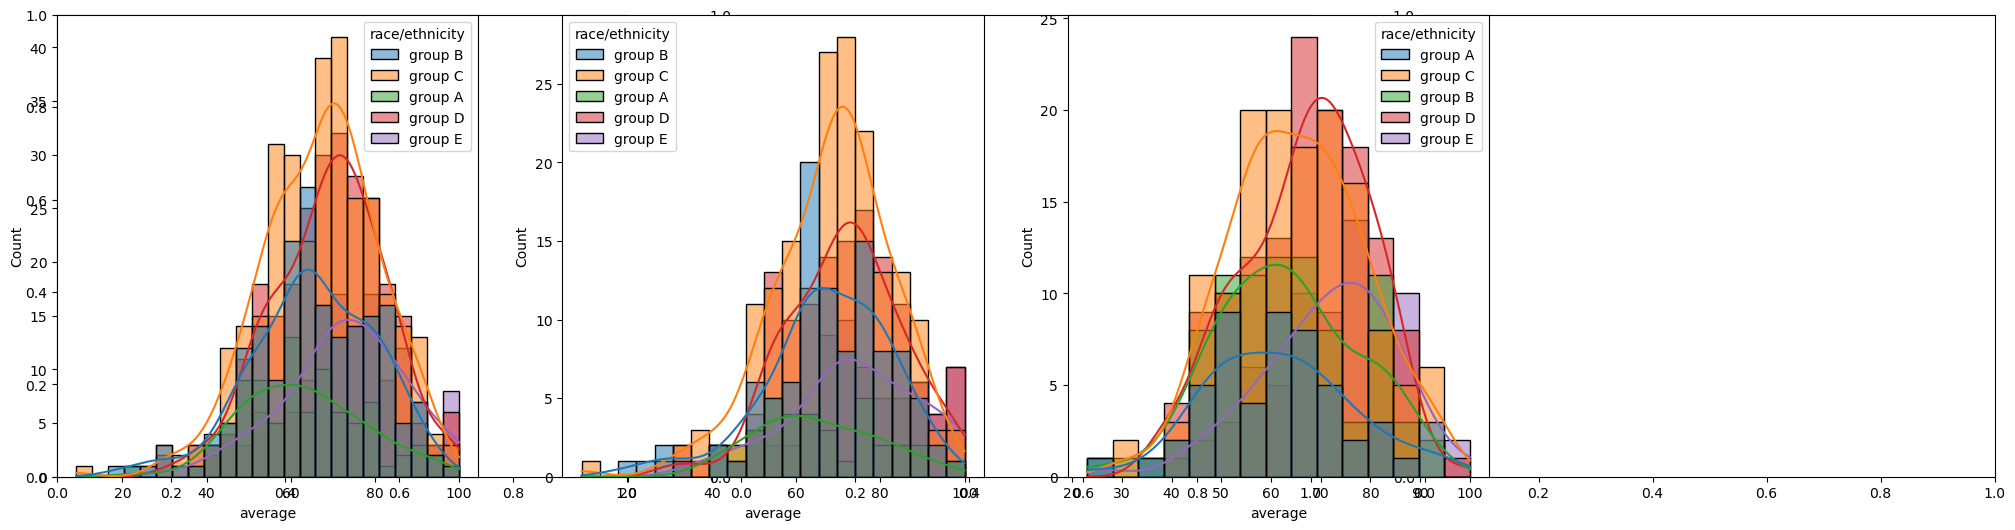

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()


insights
 . Student of group A and group B tends to perform poorly in exam.
 . Student of group A and B tends to perform poorly in exams irrespective of whether they ar male or female.

4.2 Maximumum score of students in all three subjects

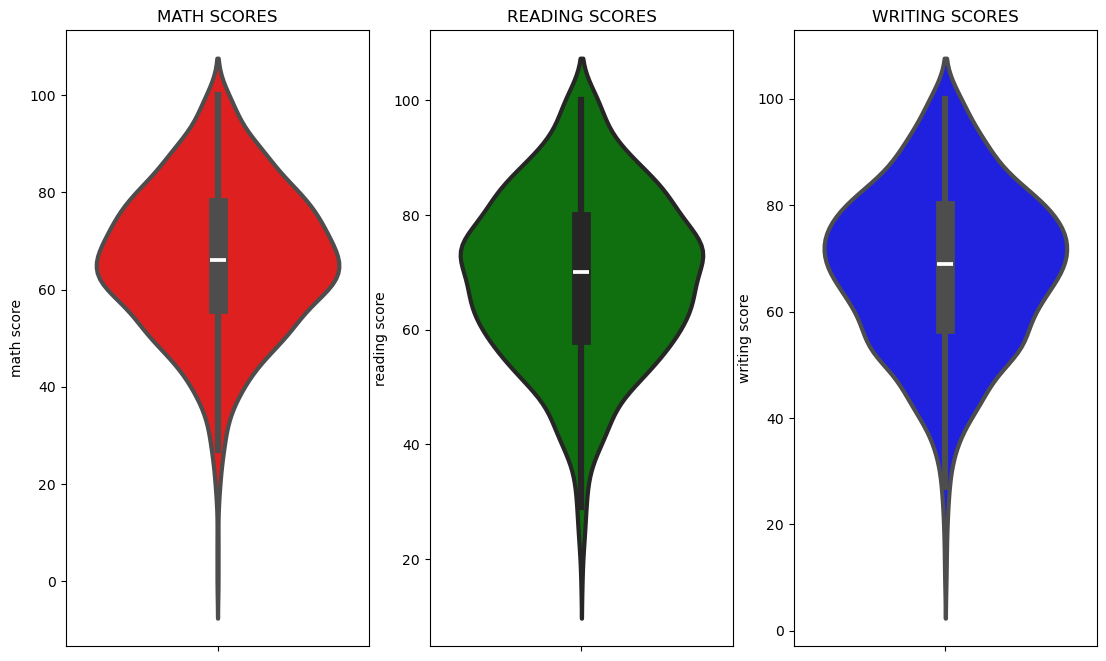

In [46]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()


insights
 . From the above three plots its clearly visible that most of the students score in between 60-80 in maths where as in reading and writing most of them score fro, 50-80

4.3 Multivariate Analysis Using Pie Plot

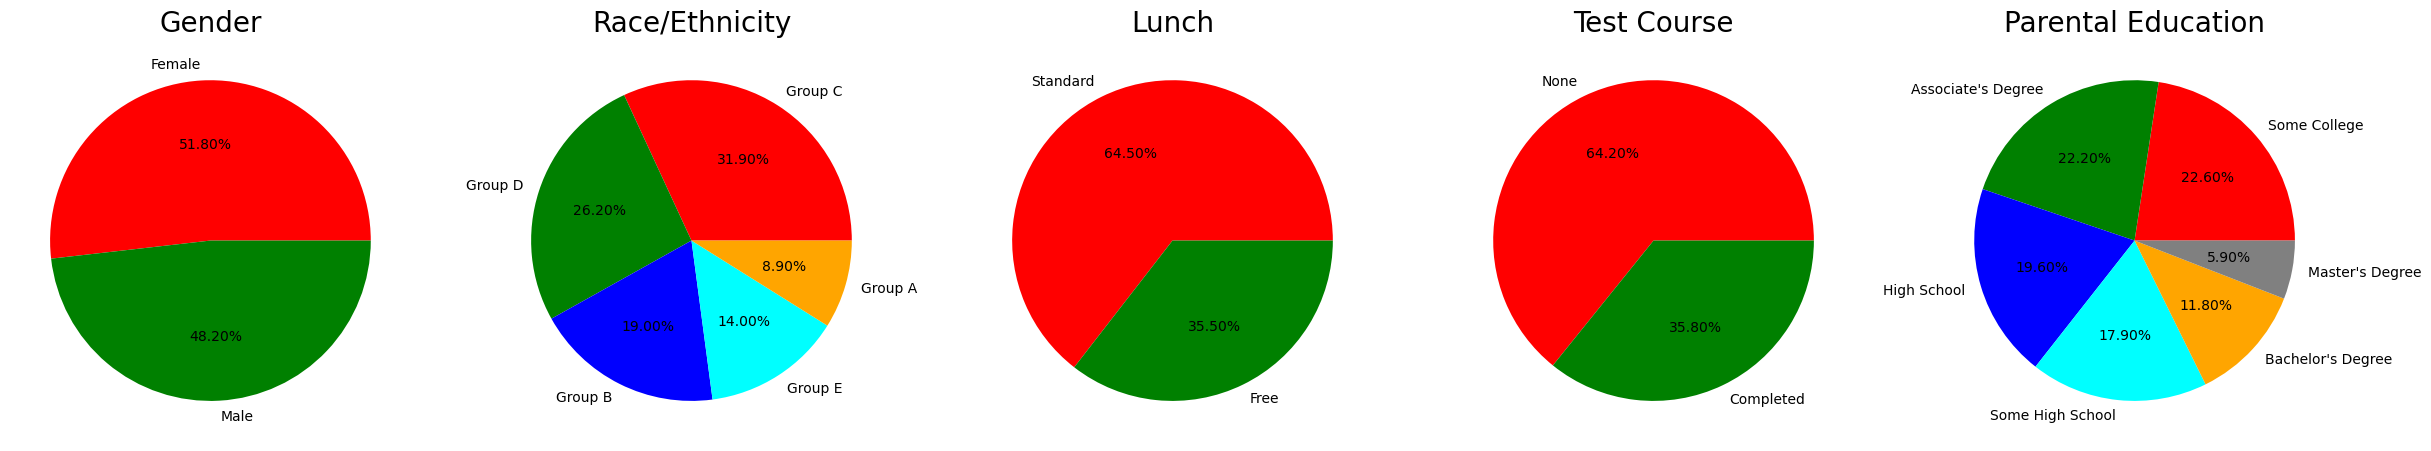

In [47]:
# Set the figure size for the entire plot
plt.rcParams['figure.figsize'] = (30, 12)

# Create a subplot with five pie charts side by side
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Continue with similar code blocks for other pie charts

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

# Adjust the layout and display the subplots

plt.grid()
plt.show()


Insights -

Number of Male and Female students is almost equal
Number students are greatest in Group C
Number of students who have standard lunch are greater
Number of students who have not enrolled in any test preparation course is greater
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

4.4 Feature Wise Visualization


4.4.1 GENDER COLUMN
How is the distribution of Gender?
Does gender have any impact on student's performance?

How is the distribution of Gender?

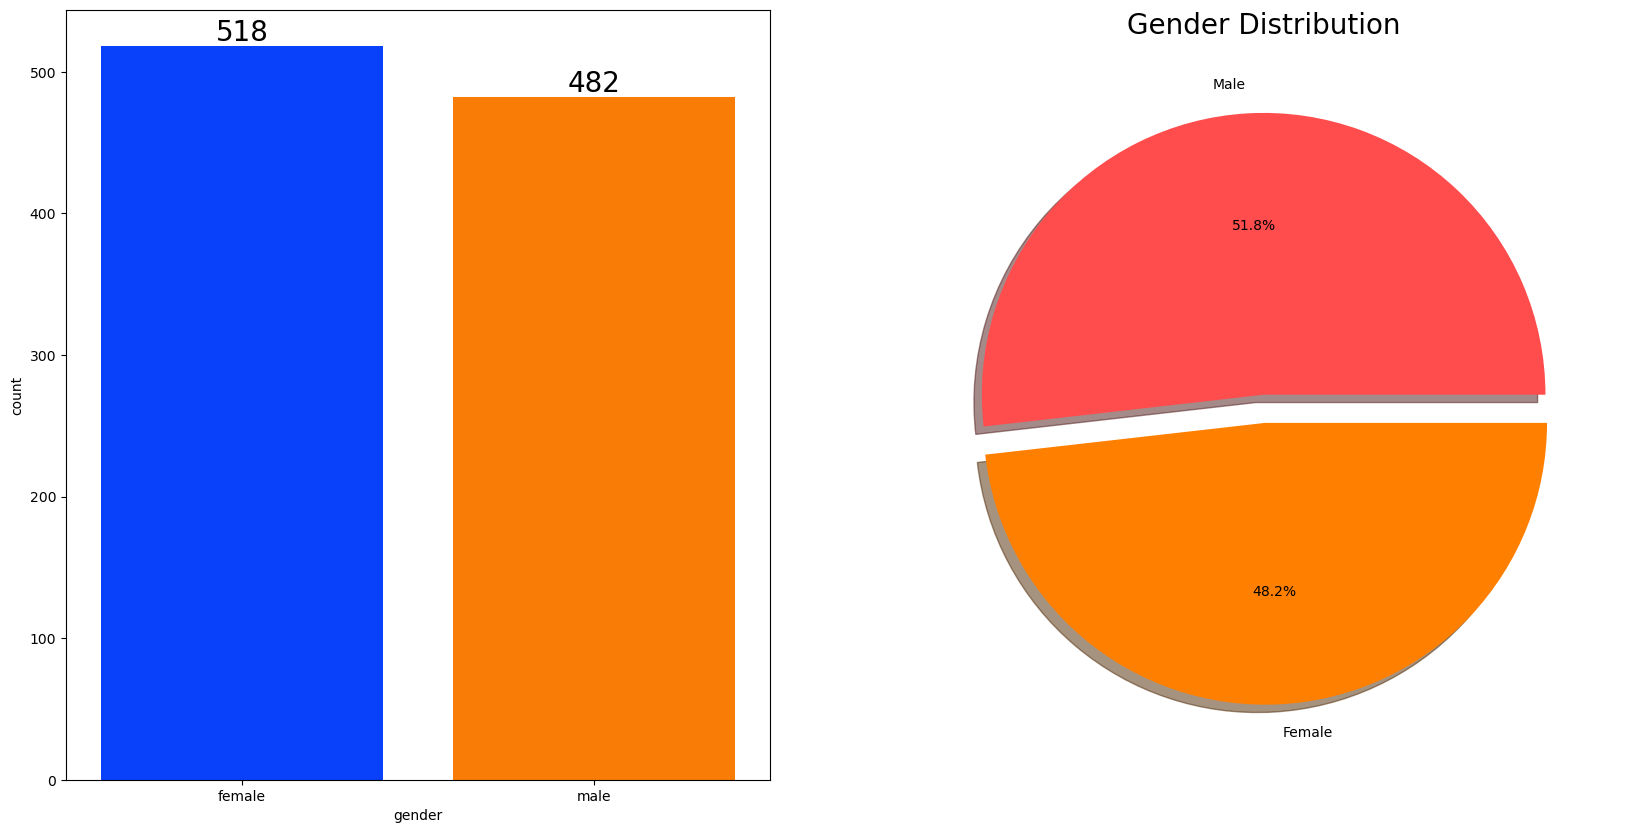

In [48]:

# Create a subplot with two plots side by side
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the countplot for gender on the left side
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the pie chart for gender distribution on the right side
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1],
        autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.title('Gender Distribution', fontsize=20)

# Display the subplots

plt.show()


Insights 

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

BIVARIATE ANALYSIS 
Is gender impacting student's performance?

In [51]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group


,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


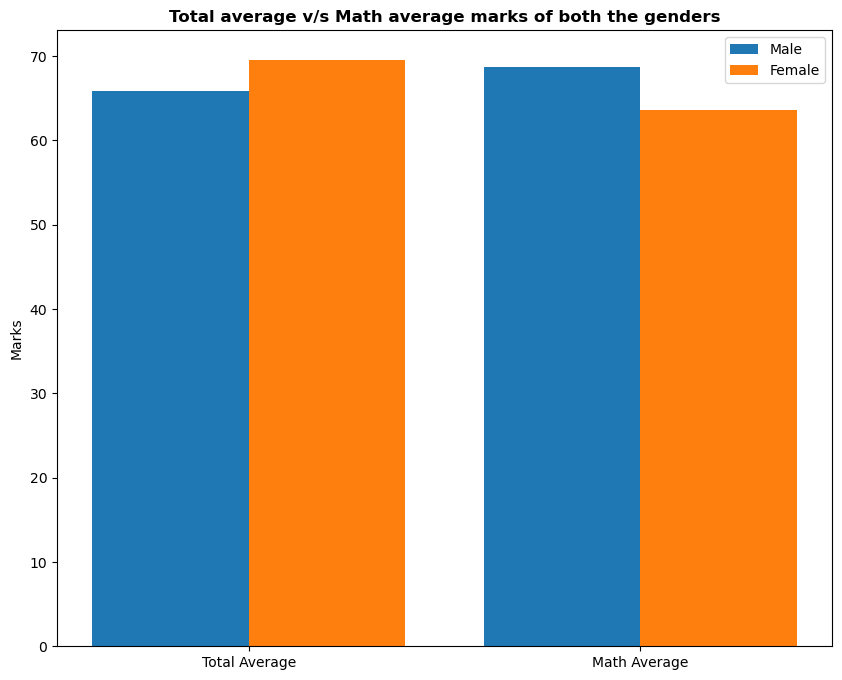

In [52]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


Insights 

On an average females have a better overall score than men.
whereas males have scored higher in Maths.

4.4.2 RACE/ETHNICITY COLUMN 

UNIVARIATE ANALYSIS 
How is Group-wise distribution? 

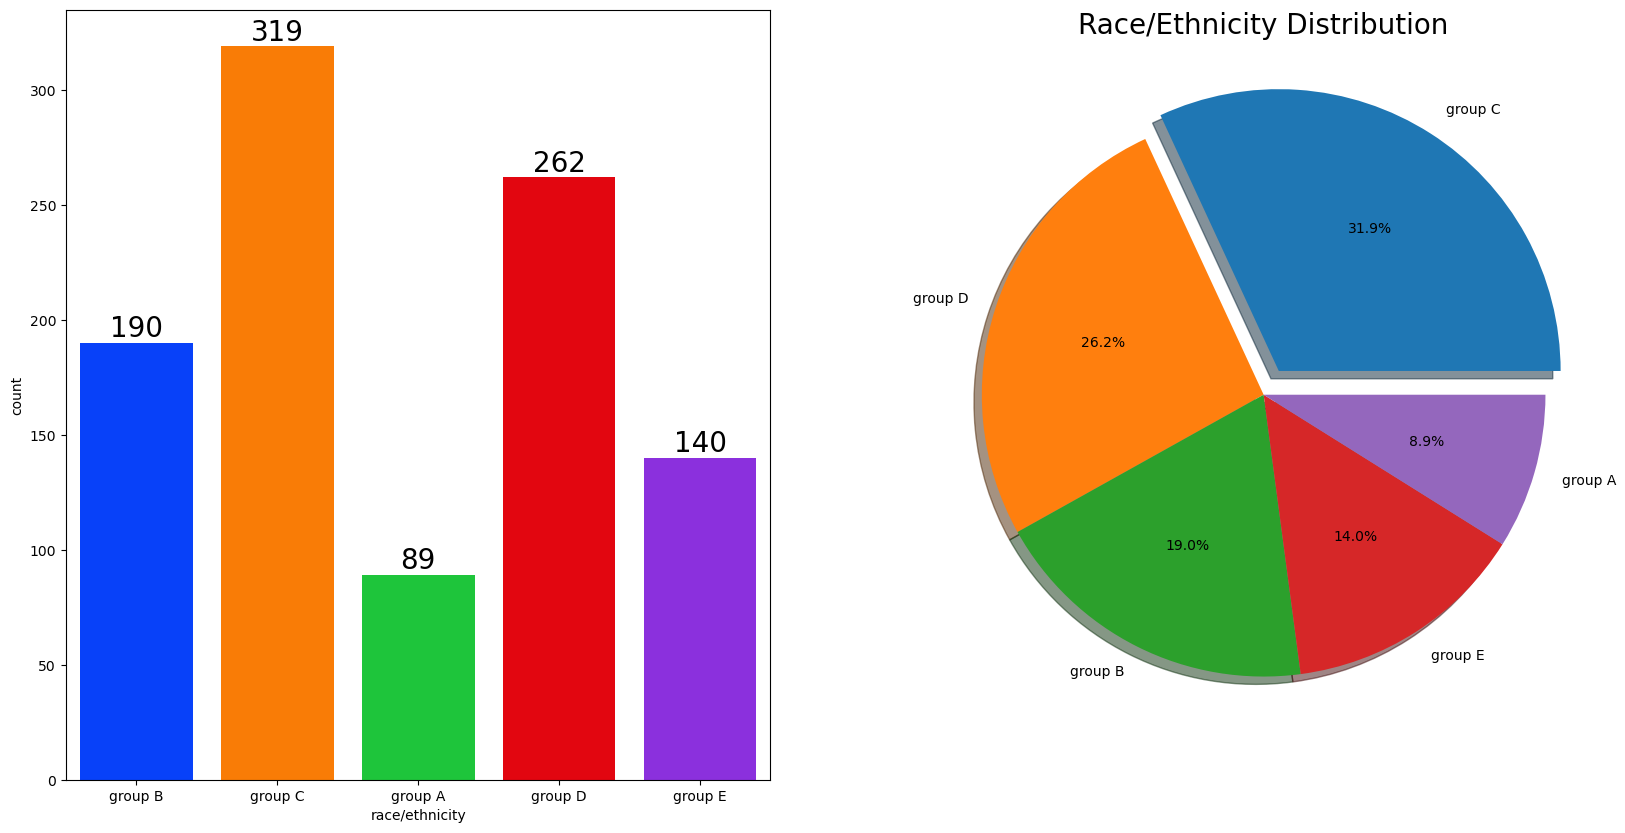

In [53]:
# Create a subplot with two plots side by side
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the countplot for race/ethnicity on the left side
sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the pie chart for race/ethnicity distribution on the right side
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.title('Race/Ethnicity Distribution', fontsize=20)

# Display the subplots
plt.show()


Insights 

Most of the student belonging from group C /group D.
Lowest number of students belong to groupA.

BIVARIATE ANALYSIS 
Is Race/Ethnicity impacting student's performance? 

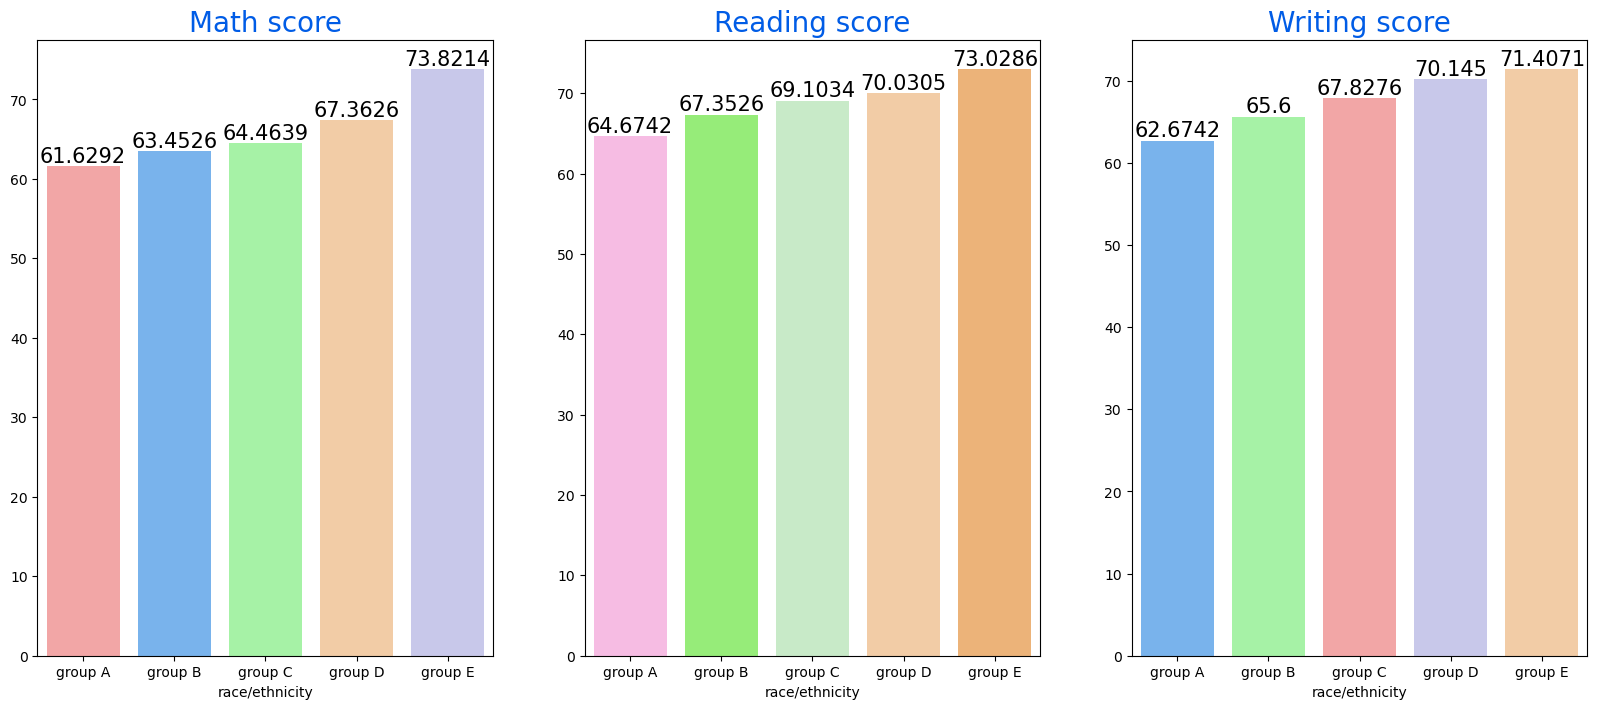

In [54]:
Group_data2 = df.groupby('race/ethnicity')

# Define custom color palettes
math_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
reading_palette = ['#ffb3e6', '#8cff66', '#c2f0c2', '#ffcc99', '#ffb366']
writing_palette = ['#66b3ff', '#99ff99', '#ff9999', '#c2c2f0', '#ffcc99']

# Create a subplot with three bar plots side by side
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot the bar plot for mean Math scores on the left
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values,
            palette=math_palette, ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot the bar plot for mean Reading scores in the middle
sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values,
            palette=reading_palette, ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plot the bar plot for mean Writing scores on the right
sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values,
            palette=writing_palette, ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

# Display the subplots

plt.show()


Insights 

Group E students have scored the highest marks.
Group A students have scored the lowest marks.
Students from a lower Socioeconomic status have a lower avg in all course subjects

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

What is the educational background of students' parents? 
Does parental education impact student's performance? 

UNIVARIATE ANALYSIS 
What is the educational background of students' parents? 

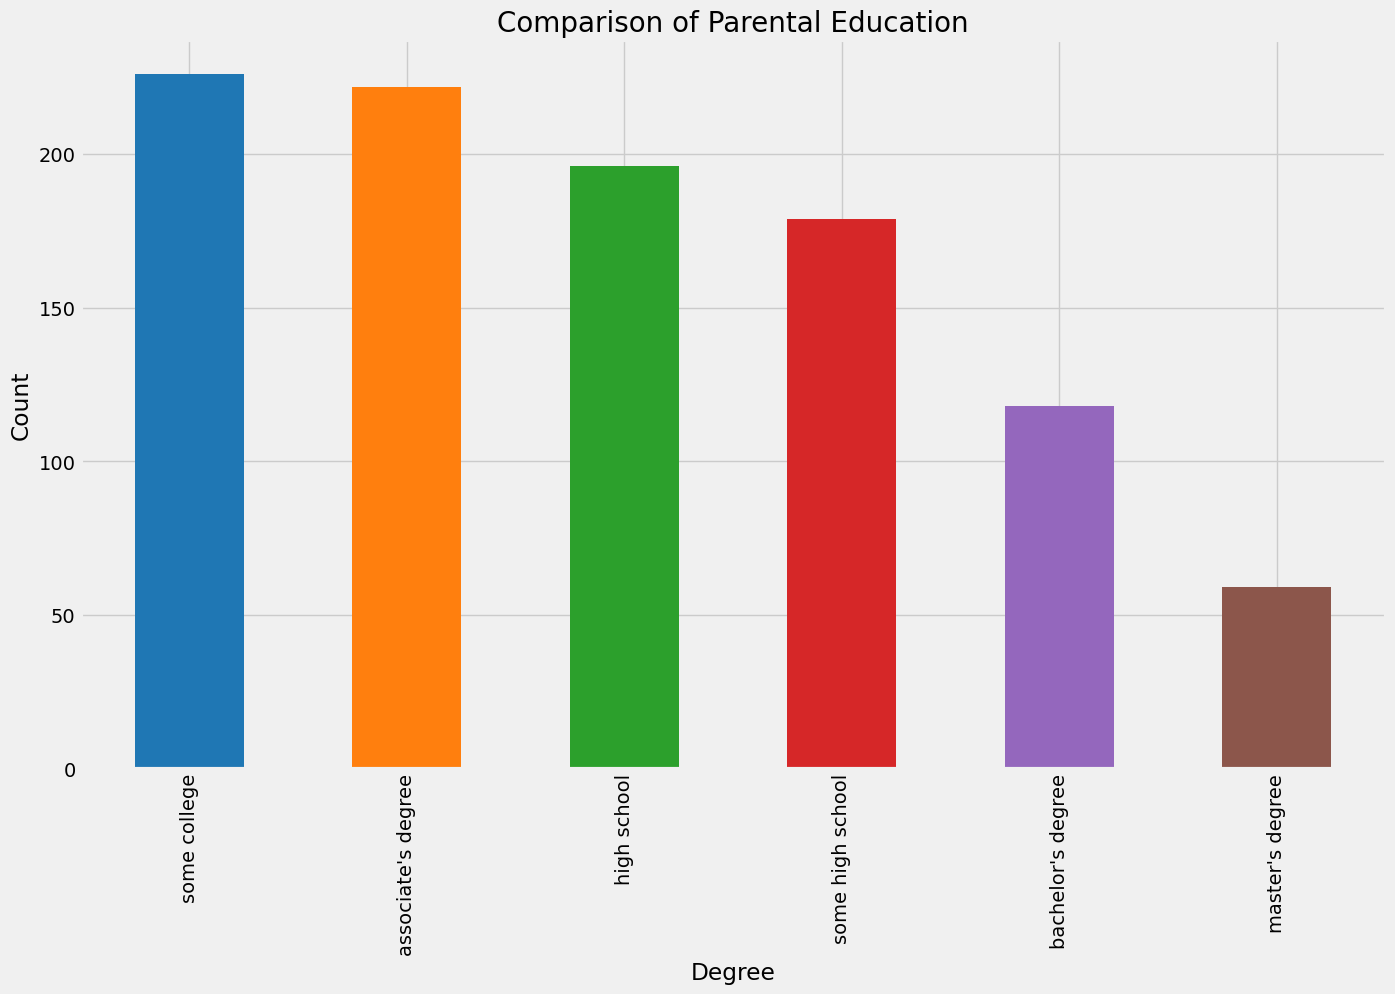

In [55]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Create a bar plot for the count of each parental level of education
df['parental level of education'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Set title and labels
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

# Display the plot
plt.show()


Insights 

Largest number of parents are from some college.

BIVARIATE ANALYSIS 
Is parental education impacting student's performance? 

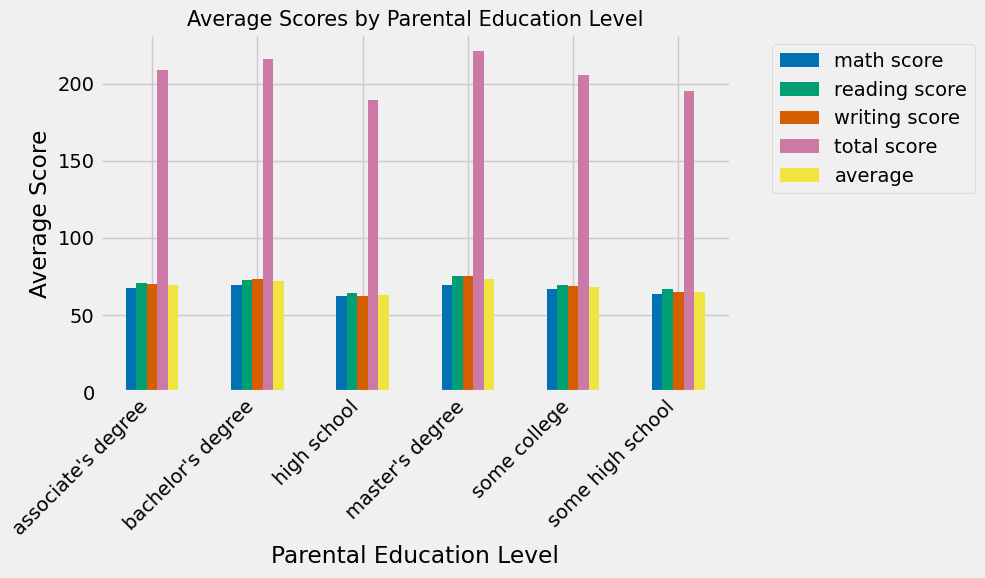

In [58]:
import matplotlib.pyplot as plt

# Set the style and figure size
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['figure.figsize'] = (10, 6)

# Group by parental education and calculate mean of numeric columns only
mean_scores_by_education = df.groupby('parental level of education').mean(numeric_only=True)

# Create grouped bar chart
mean_scores_by_education.plot(kind='bar')

# Title and labels
plt.title('Average Scores by Parental Education Level', fontsize=15)
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')

# Legend outside plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout and show
plt.tight_layout()
plt.show()


Insights 

The score of student whose parents possess master and bachelor level education are higher than others.

4.4.4 LUNCH COLUMN 
Which type of lunch is most common among students? 
What is the effect of lunch type on test results? 

UNIVARIATE ANALYSIS 
Which type of lunch is most common among students? 

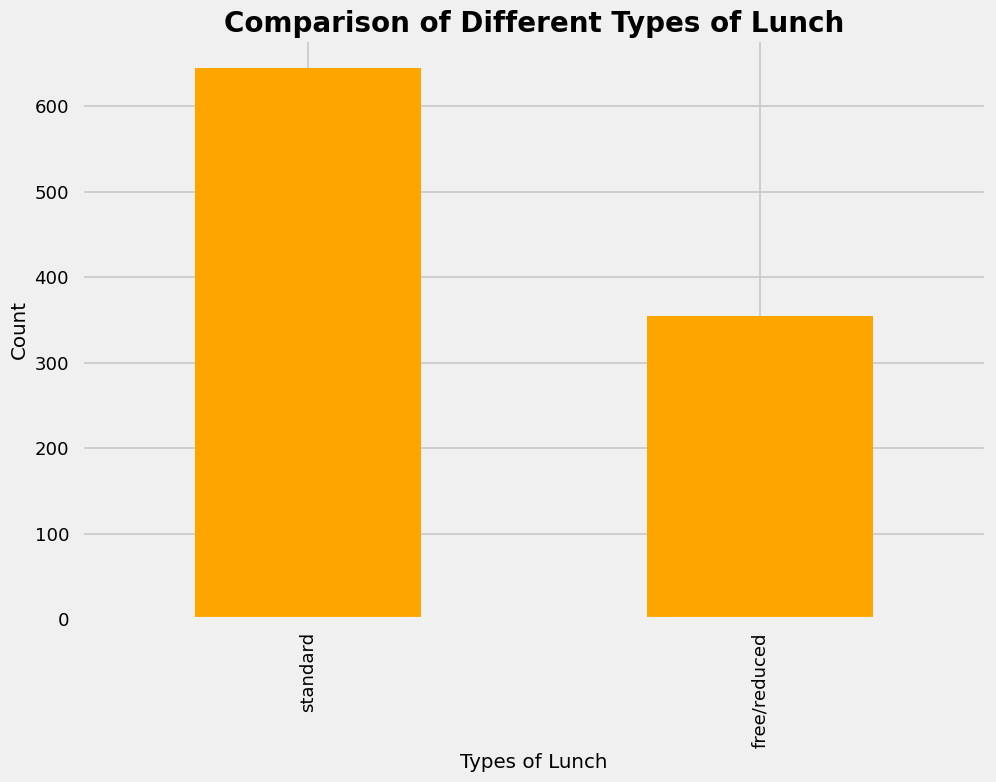

In [61]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')

# Bar plot for lunch type count
df['lunch'].value_counts().plot(kind='bar', color='orange')

# Title and labels
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Show plot
plt.show()


Insights 

Students being served Standard lunch was more than free lunch

BIVARIATE ANALYSIS 
Is lunch type intake impacting student's performance

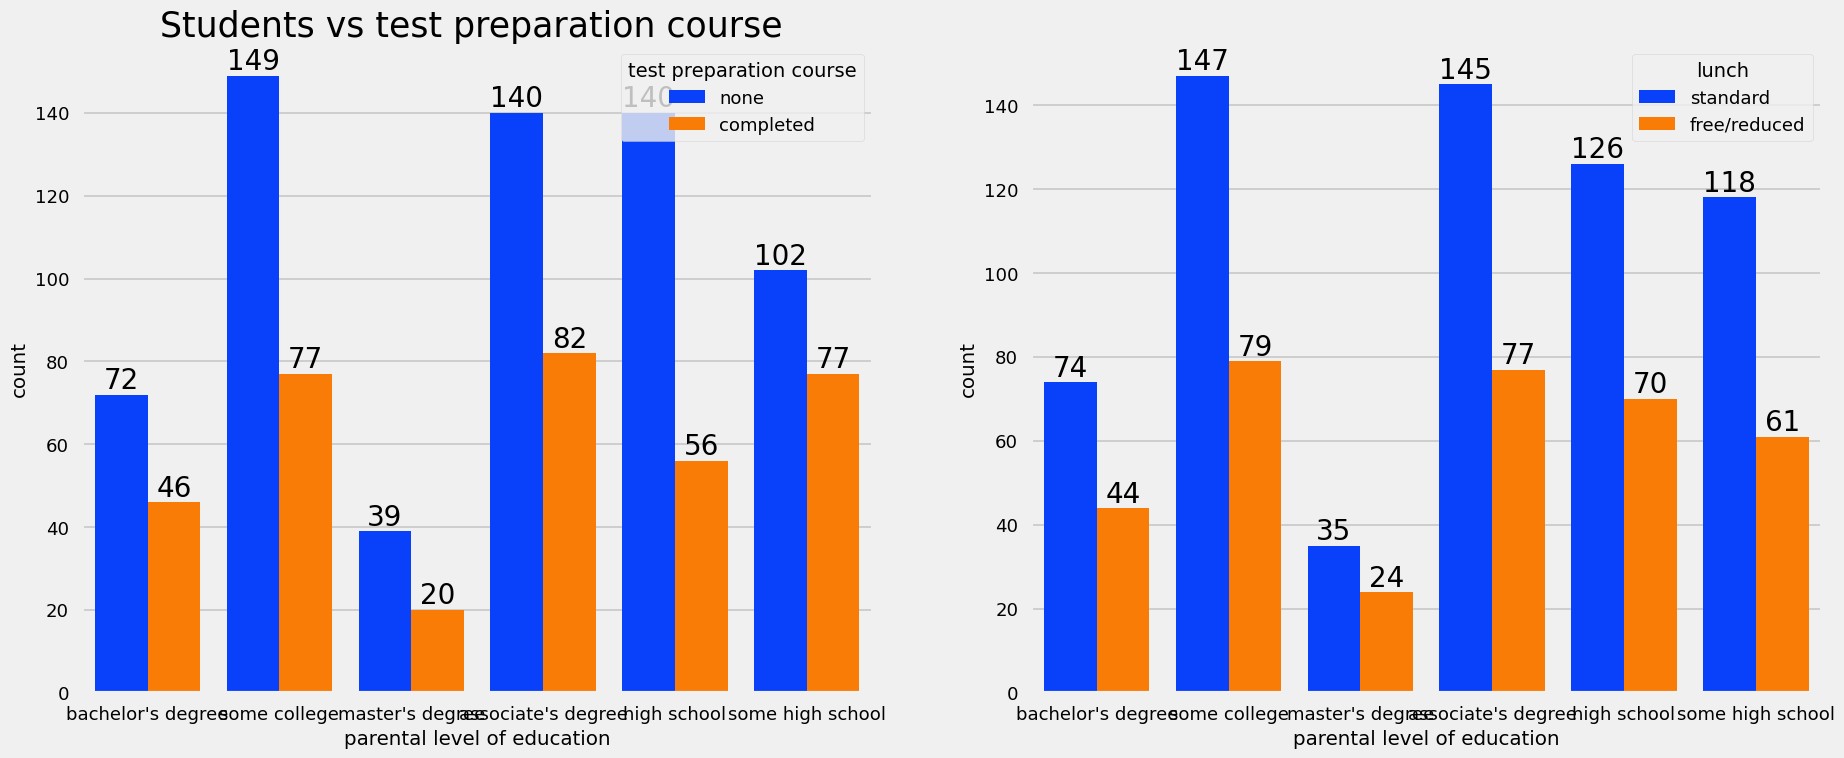

In [62]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   


Insights 

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

4.4.5 TEST PREPARATION COURSE COLUMN 
Which type of lunch is most common among students? 
Is Test preparation course impacting student's performance? 

BIVARIATE ANALYSIS 
Is Test preparation course impacting student's performance

<Axes: xlabel='lunch', ylabel='writing score'>

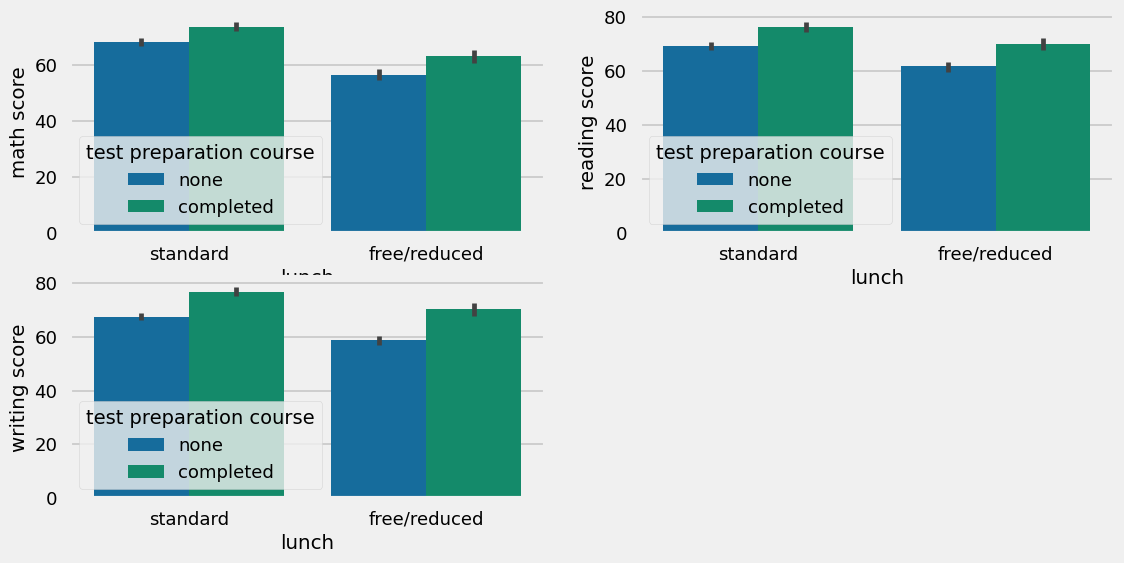

In [64]:

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])


Insights

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

4.4.6 CHECKING OUTLIERS

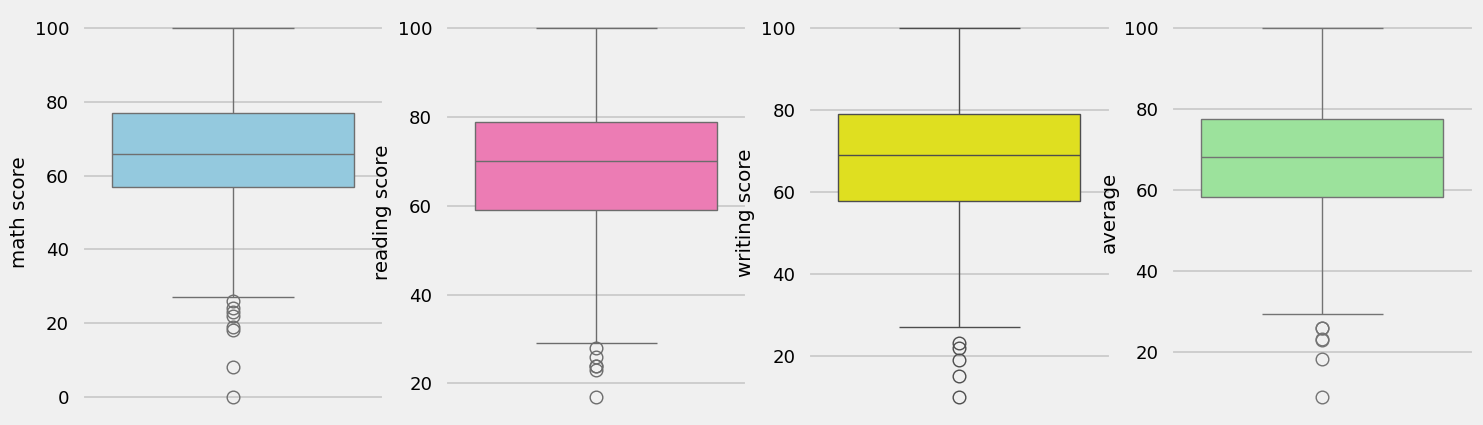

In [65]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()


4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

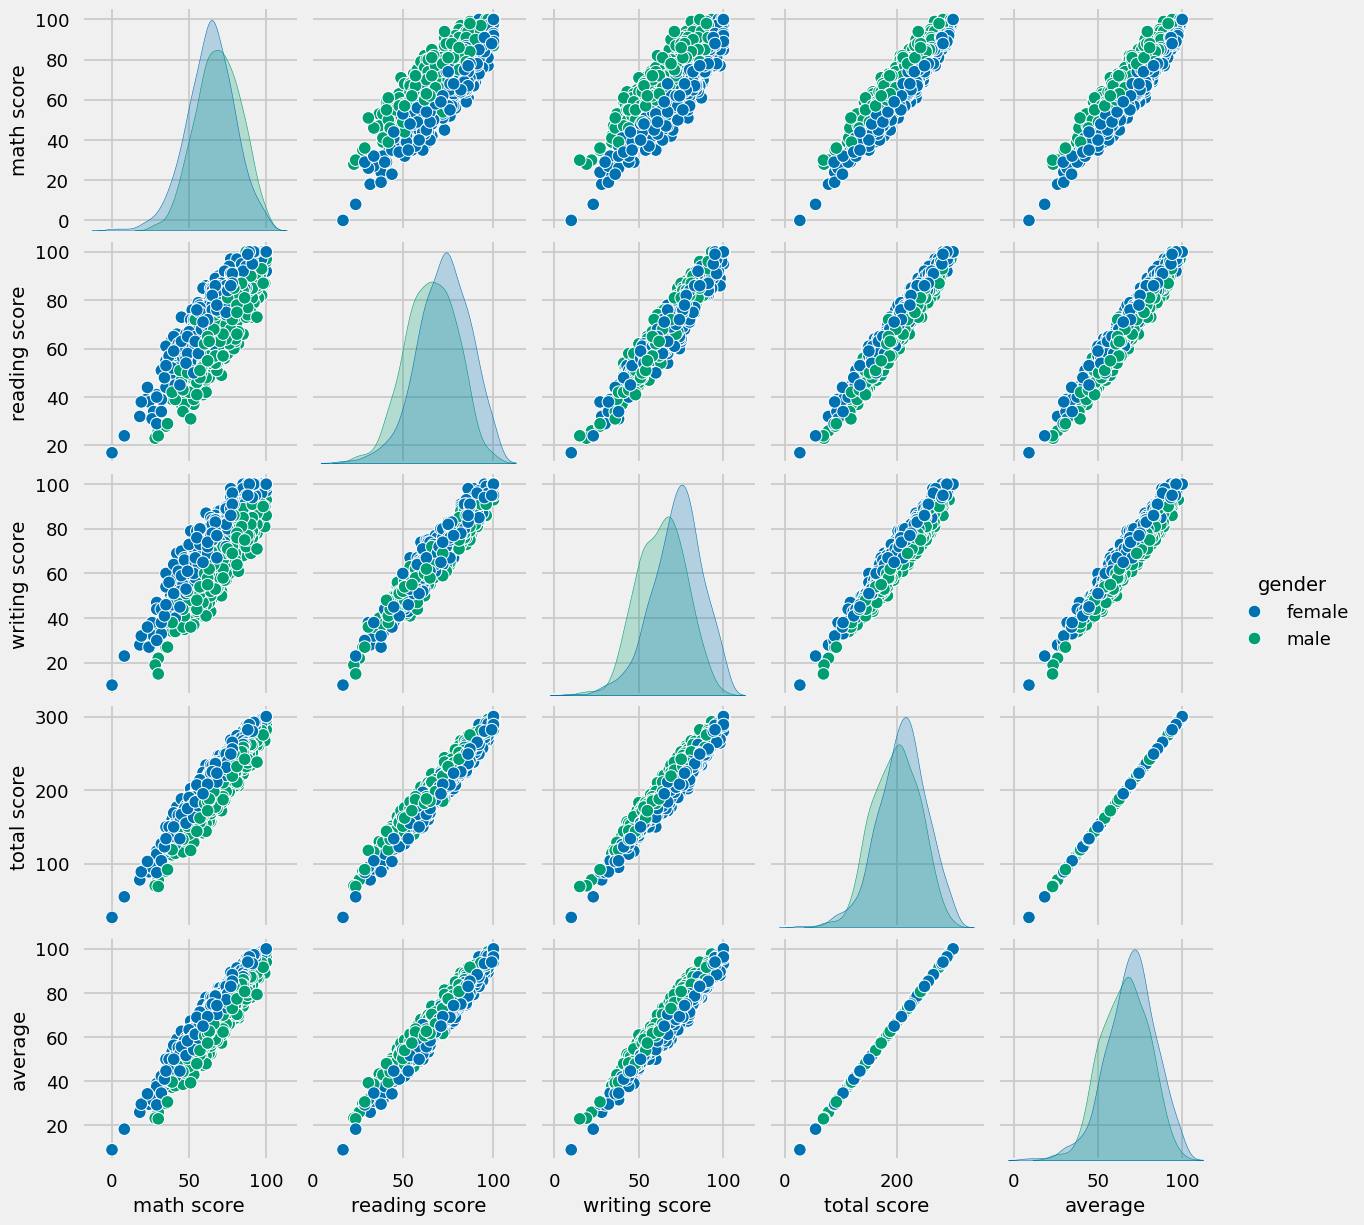

In [66]:
sns.pairplot(df,hue = 'gender')
plt.show()


Insights 

From the above plot it is clear that all the scores increase linearly with each other.

Conclusions 
Student's performance is correlated with factors such as lunch, race, and parental level of education.
Females have a higher pass percentage and also achieve top scores.
Student's performance doesn't show a strong correlation with completing a test preparation course.
Completing a preparation course has shown to be beneficial.